<html>
<body>
    <div class="image-container" style="display: flex;">
        <img src="https://ufal.br/ufal/resolveuid/5ba5577fc45f41f48a6e8e9311488b28" alt="Image 1" style="width: 15%; height: auto;">
        <img src="https://ic.ufal.br/site-logo" alt="Image 2" style="width: 15%; height: auto;">
    </div>
   <h1 align="center"> Redes Neurais e Aprendizado Profundo - 2023.1 </h1>
   <h2 align="center"> Professor: Tiago Figueiredo Vieira </h2>
</body>
</html>

---

# Classification using Perceptrons

The following graph shows the distribution of samples (features $x_1$ and $x_2$) related to 3 (three) categories. In this exercise, solve the following questions:

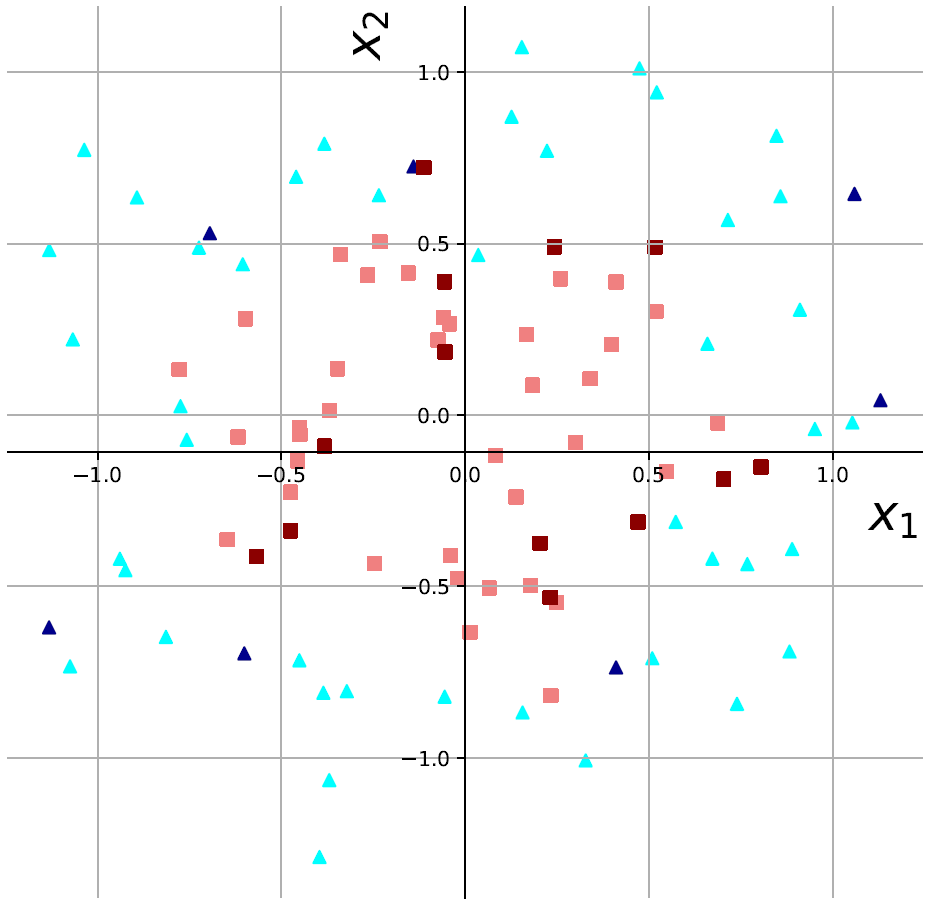

## Part 1

With the Perceptron you developed using only Numpy, provide a model capable of reasonably classifying such samples. Obs: For training procedure, use files (which are represented by light red, light green and cyan in the graph);

| Samples | Labels |
|---|---|
| X_train.npy | y_train.npy |

And for testing, use the following files (which are represented by dark blue, dark green and dark red in the graph):

| Samples | Labels |
|---|---|
| X_test.npy | y_test.npy |

In [1]:
def accuracy(predictions, y_test):
    classifications = len(y_test)
    correct_classifications = sum(p == r for p, r in zip(predictions, y_test))
    return correct_classifications / classifications

# Por padrão utilizar os nomes 'predictions' e 'y_test'

predictions = [1, 1, 1, 1, 1]
y_test = [1, 1, 2, 1, 1]

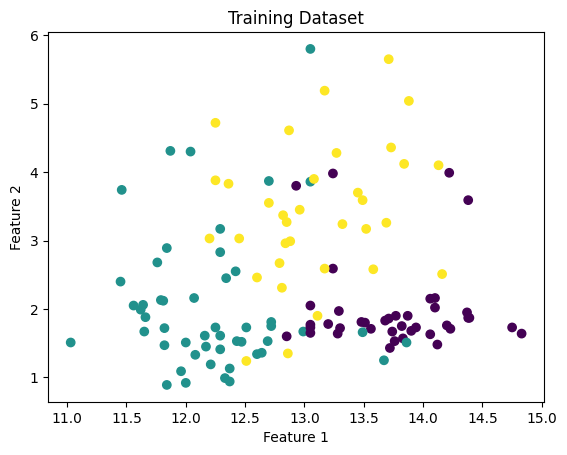

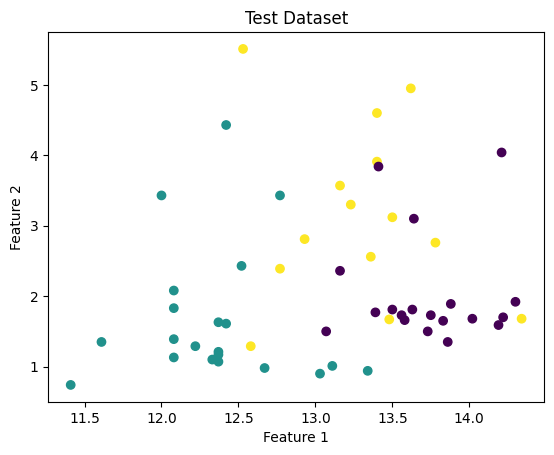

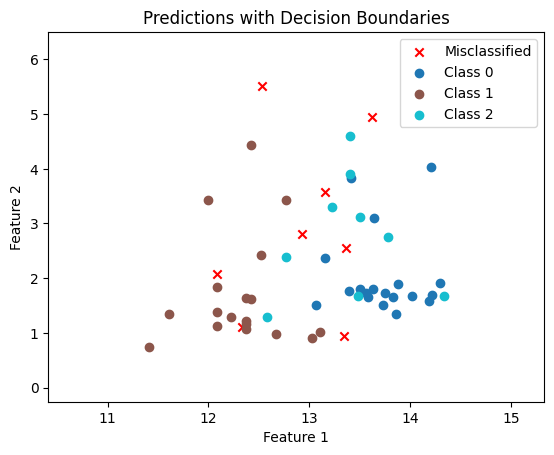

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def perceptron_train(X, y, num_classes, learning_rate=0.01, max_epochs=100):
    X = np.concatenate((X, np.ones((X.shape[0], 1))), axis=1)
    weights = np.zeros((X.shape[1], num_classes))

    for class_label in range(num_classes):
        y_class = np.where(y == class_label, 1, 0)
        class_weights = weights[:, class_label]

        for _ in range(max_epochs):
            converged = True
            for i in range(X.shape[0]):
                activation = np.dot(X[i], class_weights)
                prediction = 1 if activation >= 0 else 0
                error = y_class[i] - prediction
                if error != 0:
                    class_weights += learning_rate * error * X[i]
                    converged = False
            if converged:
                break

        weights[:, class_label] = class_weights

    return weights

def perceptron_predict(X, weights):
    X = np.concatenate((X, np.ones((X.shape[0], 1))), axis=1)
    predictions = np.dot(X, weights)
    return np.argmax(predictions, axis=1)

def plot_dataset(X, y, title):
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title(title)
    plt.show()

def plot_decision_boundary(X, y, weights):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    X_grid = np.c_[xx.ravel(), yy.ravel()]
    Z = perceptron_predict(X_grid, weights.T)
    Z = Z.reshape(xx.shape)

    unique_classes = np.unique(y)
    colors = plt.cm.tab10(np.linspace(0, 1, len(unique_classes)))  # Choose a color map (tab10 here)

    # Plot decision boundaries for each class
    for i, class_label in enumerate(unique_classes):
        class_mask = y == class_label
        plt.contourf(xx, yy, Z, levels=[class_label - 0.5, class_label + 0.5], colors=[colors[i]], alpha=0.6)

    # Demarcate misclassified points in red
    misclassified_mask = predictions != y
    plt.scatter(X[misclassified_mask, 0], X[misclassified_mask, 1], c='red', marker='x', label='Misclassified')

    # Plot classified points for each class
    for i, class_label in enumerate(unique_classes):
        class_mask = y == class_label
        plt.scatter(X[class_mask & ~misclassified_mask, 0], X[class_mask & ~misclassified_mask, 1],
                    c=[colors[i]], label=f'Class {class_label}')

    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title('Predictions with Decision Boundaries')
    plt.legend()
    plt.show()



# Carregando dados
X_test = np.load("X_test.npy")
X_train = np.load("X_train.npy")
y_train = np.load("y_train.npy")
y_test = np.load("y_test.npy")

# Plotando os dois datasets
plot_dataset(X_train, y_train, "Training Dataset")
plot_dataset(X_test, y_test, "Test Dataset")

# Contando as classes
num_classes = len(np.unique(y_train))

# Treinando classificadores
weights = perceptron_train(X_train, y_train, num_classes, learning_rate=0.4, max_epochs=1000)

# Predicoes
predictions = perceptron_predict(X_test, weights)

# Plot
plot_decision_boundary(X_test, y_test, weights)

# Acuracia
#accuracy_value = accuracy(y_test, predictions)
#print("Accuracy:", accuracy_value)

In [3]:
assert accuracy(predictions, y_test) > 0.55

## Part 2

**Perform some linear data transformation** that you believe might cause an improvement in the classification's training and testing performances.

In [4]:
def accuracy(predictions, y_test):
    classifications = len(y_test)
    correct_classifications = sum(p == r for p, r in zip(predictions, y_test))
    return correct_classifications / classifications

# Por padrão utilizar os nomes 'predictions' e 'y_test'

predictions = [1, 1, 1, 1, 1]
y_test = [1, 1, 2, 1, 1]

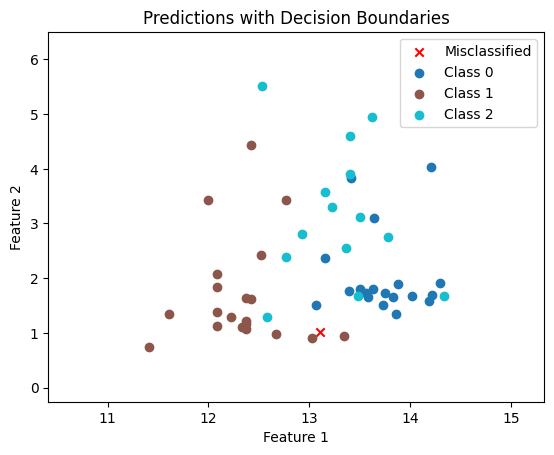

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def scale_features(X, scale_factor):
    return X * scale_factor

def perceptron_train(X, y, num_classes, learning_rate=0.01, max_epochs=100, scale_factor=1.0):
    X = scale_features(X, scale_factor)  # Fator de escala
    X = np.concatenate((X, np.ones((X.shape[0], 1))), axis=1)
    weights = np.zeros((X.shape[1], num_classes))

    for class_label in range(num_classes):
        y_class = np.where(y == class_label, 1, 0)
        class_weights = weights[:, class_label]

        for _ in range(max_epochs):
            converged = True
            for i in range(X.shape[0]):
                activation = np.dot(X[i], class_weights)
                prediction = 1 if activation >= 0 else 0
                error = y_class[i] - prediction
                if error != 0:
                    class_weights += learning_rate * error * X[i]
                    converged = False
            if converged:
                break

        weights[:, class_label] = class_weights

    return weights

def perceptron_predict(X, weights):
    X = np.concatenate((X, np.ones((X.shape[0], 1))), axis=1)
    predictions = np.dot(X, weights)  # Transpose weights removed here
    return np.argmax(predictions, axis=1)

def plot_dataset(X, y, title):
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title(title)
    plt.show()

def plot_decision_boundary(X, y, weights):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    X_grid = np.c_[xx.ravel(), yy.ravel()]
    Z = perceptron_predict(X_grid, weights.T)  # Transpose weights here
    Z = Z.reshape(xx.shape)

    unique_classes = np.unique(y)
    colors = plt.cm.tab10(np.linspace(0, 1, len(unique_classes)))  # Choose a color map (tab10 here)

    # Plot decision boundaries for each class
    for i, class_label in enumerate(unique_classes):
        class_mask = y == class_label
        plt.contourf(xx, yy, Z, levels=[class_label - 0.5, class_label + 0.5], colors=[colors[i]], alpha=0.6)

    # Demarcate misclassified points in red
    misclassified_mask = predictions != y_test
    plt.scatter(X_test[misclassified_mask, 0], X_test[misclassified_mask, 1], c='red', marker='x', label='Misclassified')

    # Plot classified points for each class
    for i, class_label in enumerate(unique_classes):
        class_mask = y_test == class_label
        plt.scatter(X_test[class_mask & ~misclassified_mask, 0], X_test[class_mask & ~misclassified_mask, 1],
                    c=[colors[i]], label=f'Class {class_label}')

    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title('Predictions with Decision Boundaries')
    plt.legend()
    plt.show()


# Carregando dados
X_test = np.load("X_test.npy")
X_train = np.load("X_train.npy")
y_train = np.load("y_train.npy")
y_test = np.load("y_test.npy")

# Contando as classes
num_classes = len(np.unique(y_train))

# Treinando classificadores
scale_factor = 0.7
weights = perceptron_train(X_train, y_train, num_classes, learning_rate=0.1, max_epochs=10000, scale_factor=scale_factor)

# Predicoes
predictions = perceptron_predict(X_test, weights)

# Plot
plot_decision_boundary(X_test, y_test, weights)

# Acuracia
#accuracy_value = accuracy(y_test, predictions)
#print("Accuracy:", accuracy_value)

In [6]:
assert accuracy(predictions, y_test) > 0.55